In [1]:
### Importing Libraries for Analysis and Preprocessing of the Data
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

## Importing tensorflow to create neural network
import tensorflow as tf
## Importing Early Stropping from keras library
from tensorflow.keras.callbacks import EarlyStopping
## Importing Metrics for checking the accuracy
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy, F1Score

## Importing Libraries to Create Machine Learning Models
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



In [2]:
### Removing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os

In [4]:
## Loading the Dataset
df = pd.read_csv("C:\\Users\\tejas\\Downloads\\nearest-earth-objects(1910-2024).csv")
## Checking the first five rows of the dataset
df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.40105,58143623.32,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.75710,55801047.82,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.50680,67206887.72,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.07681,30396444.12,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.51948,63118626.51,False


In [5]:
### Checking the last 5 rows of the Dataset
df.tail()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
338194,54403809,(2023 VS4),28.580,0.005112,0.011430,Earth,56646.98599,6.406548e+07,False
338195,54415298,(2023 XW5),28.690,0.004859,0.010865,Earth,21130.76895,2.948883e+07,False
338196,54454871,(2024 KJ7),21.919,0.109839,0.245607,Earth,11832.04103,5.346078e+07,False
338197,54456245,(2024 NE),23.887,0.044377,0.099229,Earth,56198.38273,5.184742e+06,False
338198,54460573,(2024 NH3),22.951,0.068290,0.152700,Earth,42060.35783,7.126682e+06,False


In [6]:
### Checking some sample rows of the dataset
df.sample(4)

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
232079,3591407,(2011 XA3),20.46,0.215058,0.480884,Earth,122583.96610,16905455.85,True
244533,3773914,(2017 GO6),19.40,0.350393,0.783502,Earth,45559.79788,74375182.25,False
258857,54209301,(2021 TJ14),24.62,0.031663,0.070801,Earth,27005.16225,59496003.26,False
80766,3467354,(2009 SV17),19.61,0.318094,0.711279,Earth,28112.56592,34930572.13,False


In [7]:
### Checking the shape of the dataset
df.shape

(338199, 9)

In [8]:
### Checking the info of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [9]:
df['orbiting_body'].value_counts()

orbiting_body
Earth    338199
Name: count, dtype: int64

In [10]:
categorical_col = [i for i in df.columns if df[i].dtypes == 'object']

In [11]:
categorical_col

['name', 'orbiting_body']

In [12]:
### Dropping columns
df.drop(columns=categorical_col, axis=1, inplace=True)

In [13]:
df.drop(columns=['neo_id'], axis=1, inplace=True)

In [14]:
### Checking the Shape of the Dataset
df.shape

(338199, 6)

In [15]:
df.isnull().sum()

absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

In [16]:
### Checking the 5 number summary of the dataset and then handling the missing values
df.describe()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,338171.000000,338171.000000,338171.000000,338199.000000,3.381990e+05
mean,22.932525,0.157812,0.352878,51060.662908,4.153535e+07
std,2.911216,0.313885,0.701869,26399.238435,2.077399e+07
min,9.250000,0.000511,0.001143,203.346432,6.745533e+03
25%,20.740000,0.025384,0.056760,30712.031470,2.494540e+07
50%,22.800000,0.073207,0.163697,47560.465470,4.332674e+07
75%,25.100000,0.189041,0.422708,66673.820615,5.933961e+07
max,33.580000,37.545248,83.953727,291781.106600,7.479865e+07


In [17]:
df.dropna(inplace=True)

In [18]:
df.isnull().sum()

absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64

In [19]:
df.shape

(338171, 6)

In [20]:
df.dtypes

absolute_magnitude        float64
estimated_diameter_min    float64
estimated_diameter_max    float64
relative_velocity         float64
miss_distance             float64
is_hazardous                 bool
dtype: object

In [21]:
### Checking the Distribution of numerical Columns
numerical_col = [i for i in df.columns if df[i].dtypes == 'float64']

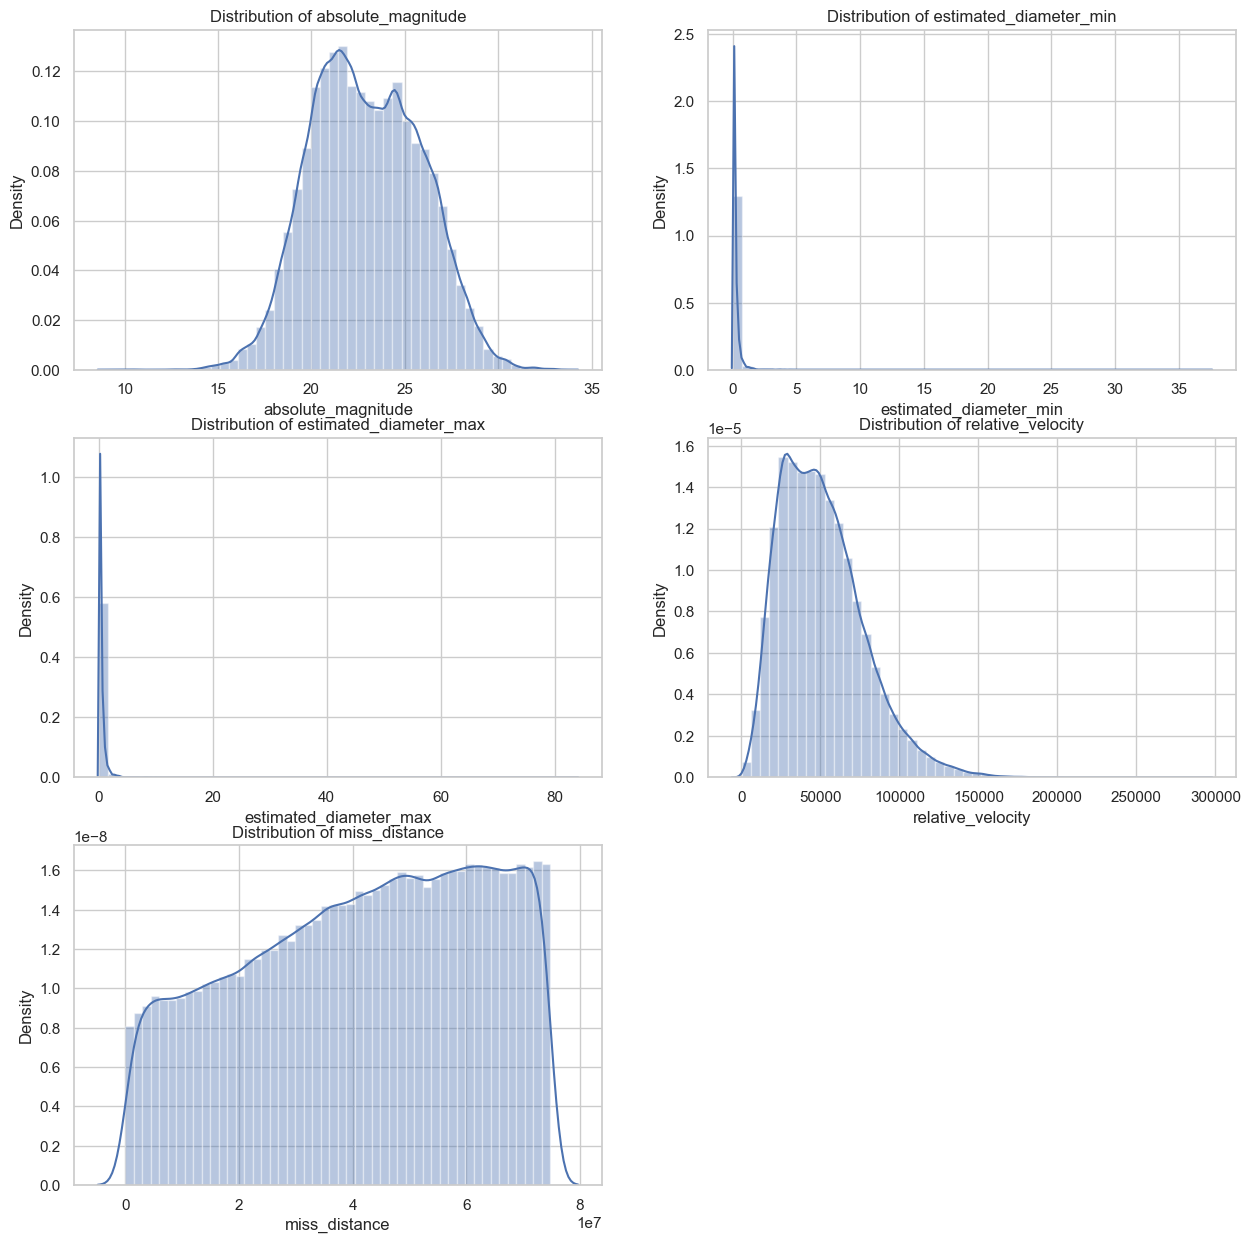

In [22]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_col):
    plt.subplot(3, 2, i+1)
    sns.distplot(df[col])
    plt.title(f'Distribution of {col}')
plt.show()

<Axes: ylabel='Density'>

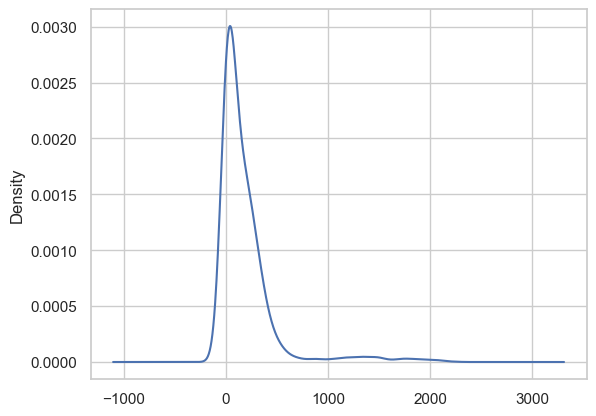

In [23]:
df['estimated_diameter_min'].value_counts().plot(kind='kde')

<Axes: ylabel='Density'>

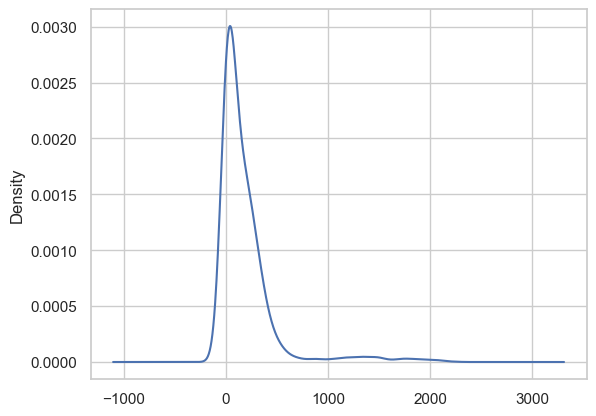

In [24]:
df['estimated_diameter_max'].value_counts().plot(kind='kde')

<Axes: ylabel='Density'>

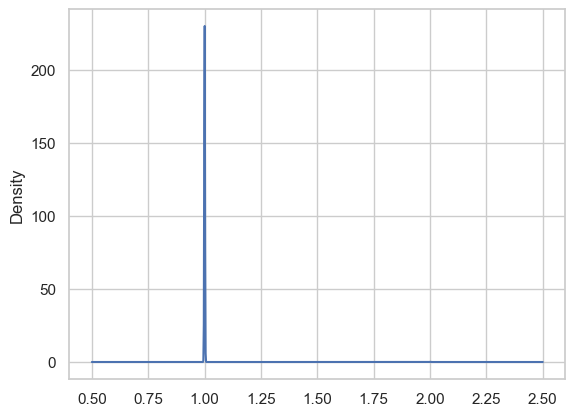

In [25]:
df['relative_velocity'].value_counts().plot(kind='kde')

In [26]:
df['relative_velocity'].max(), df['relative_velocity'].min()

(291781.1066, 203.3464325)

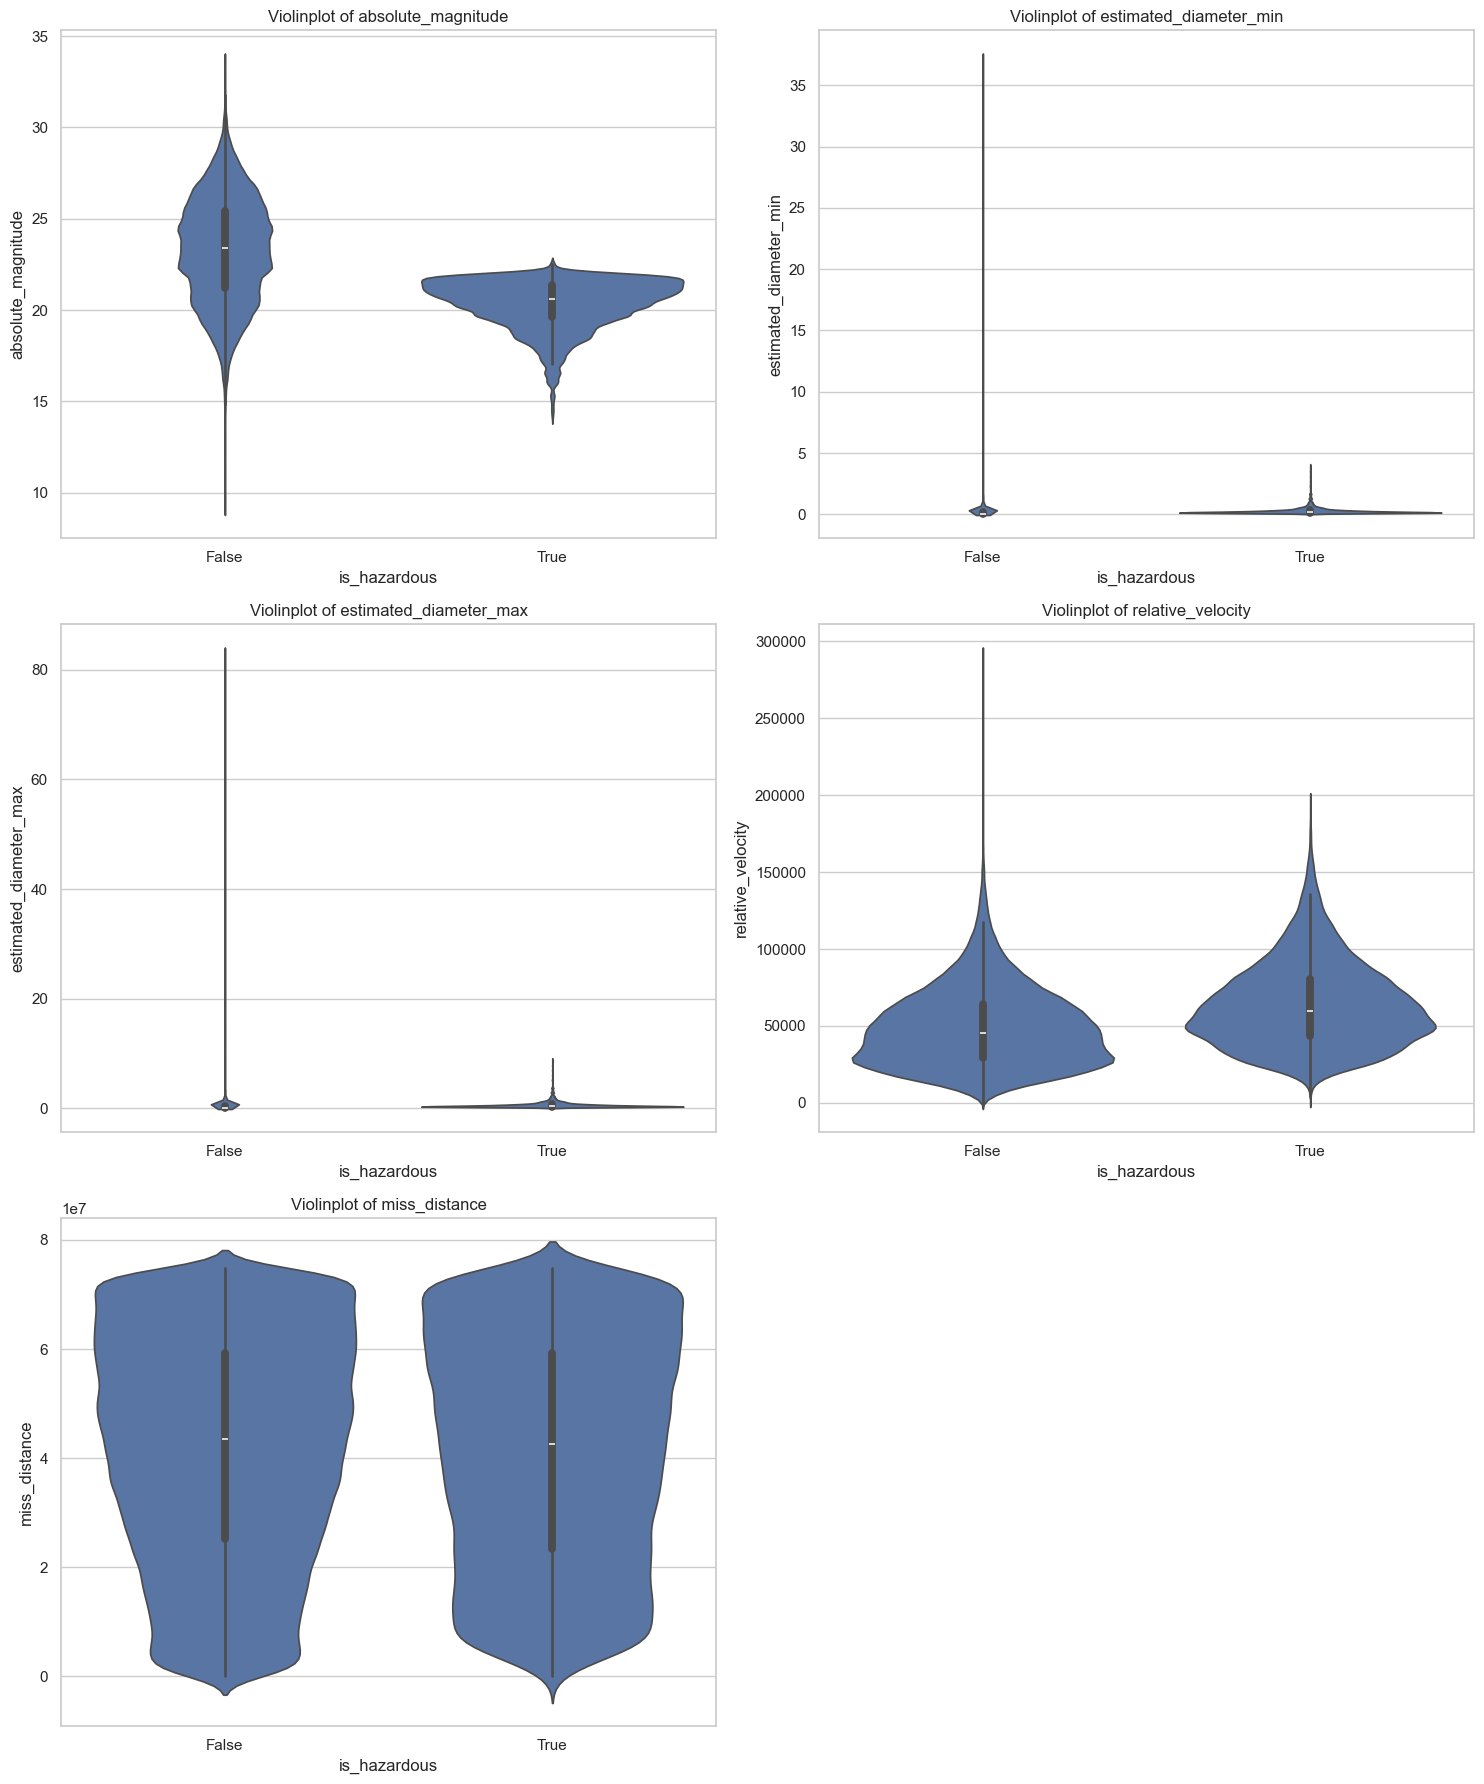

In [27]:
plt.figure(figsize=(15,18))
for i,column in enumerate(numerical_col):
    plt.subplot(3,2,i+1)
    sns.violinplot(x='is_hazardous' ,y=column,data=df)
    plt.title('Violinplot of {}'.format(column))
plt.tight_layout()
plt.show()

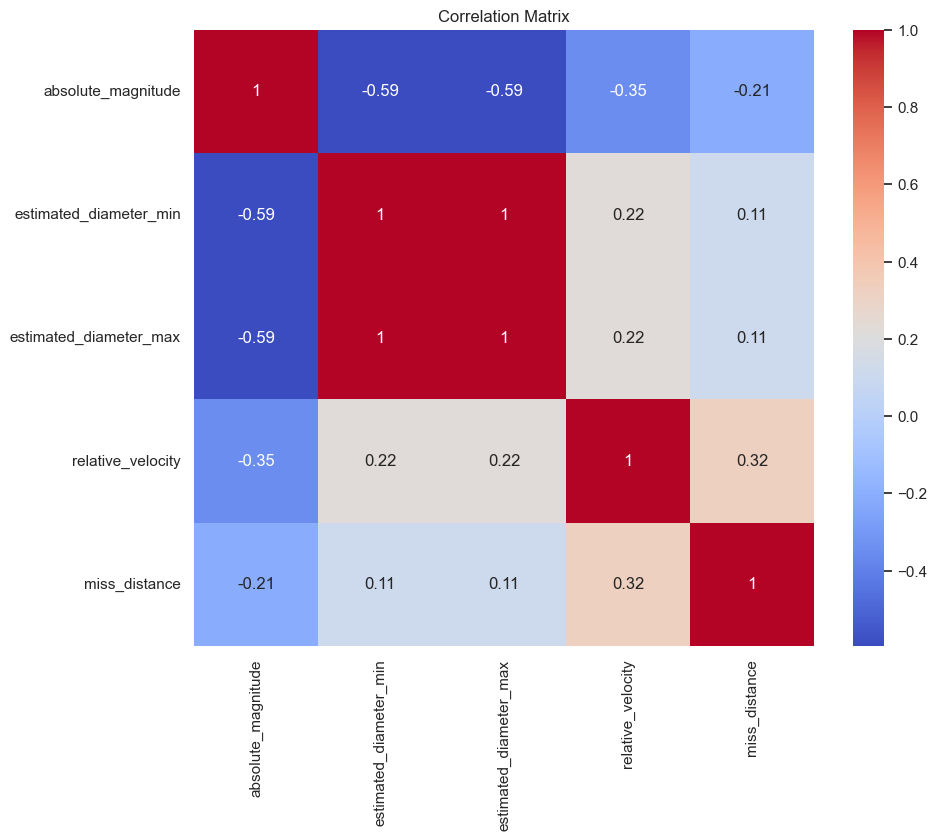

In [28]:
# Heatmap of correlations
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_col].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [29]:
df.columns

Index(['absolute_magnitude', 'estimated_diameter_min',
       'estimated_diameter_max', 'relative_velocity', 'miss_distance',
       'is_hazardous'],
      dtype='object')

In [30]:
### Specify the columns which we have to split
columns = ['absolute_magnitude', 'relative_velocity', 'miss_distance']
scale = MinMaxScaler()

In [31]:
for i in numerical_col:
    df[i] = scale.fit_transform(df[[i]])

In [32]:
df.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,0.406494,0.010506,0.010506,0.245362,0.777315,False
1,0.380189,0.014112,0.014112,0.376388,0.745994,True
2,0.501439,0.003617,0.003617,0.084582,0.898495,False
3,0.467735,0.005283,0.005283,0.269865,0.406323,False
4,0.552815,0.002028,0.002028,0.191486,0.843833,False


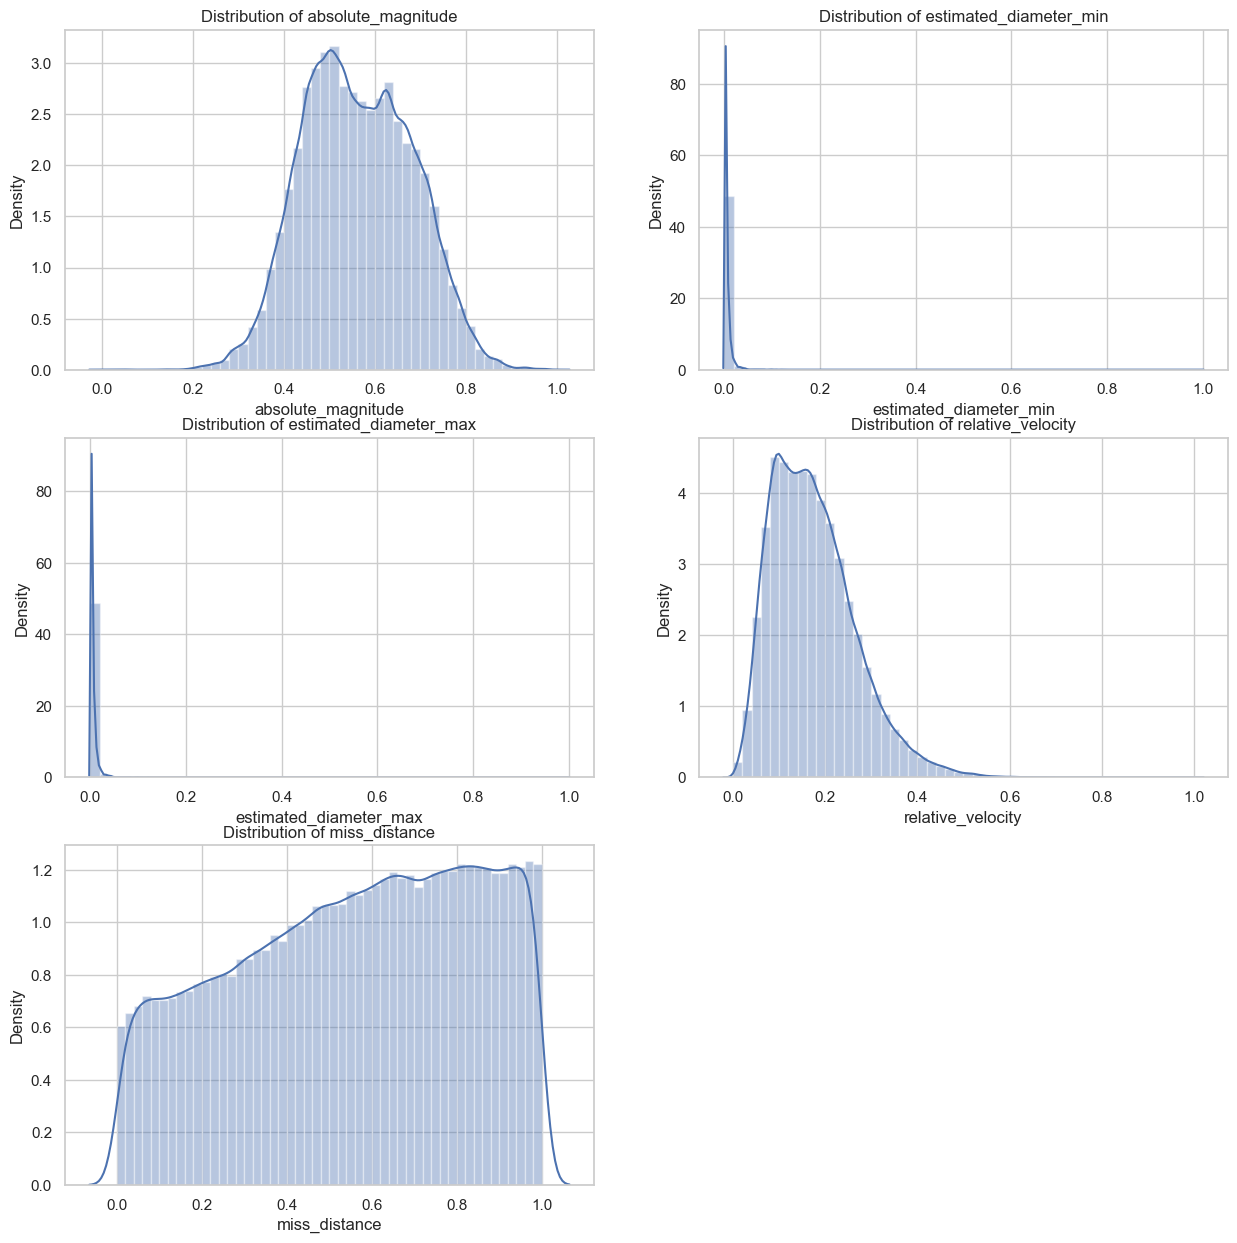

In [33]:
## Now Checking the Distribution of the data
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_col):
    plt.subplot(3, 2, i+1)
    sns.distplot(df[col])
    plt.title(f'Distribution of {col}')
plt.show()

In [34]:
encode = LabelEncoder()
df['is_hazardous'] = encode.fit_transform(df['is_hazardous'])

In [35]:
df

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,0.406494,0.010506,0.010506,0.245362,0.777315,0
1,0.380189,0.014112,0.014112,0.376388,0.745994,1
2,0.501439,0.003617,0.003617,0.084582,0.898495,0
3,0.467735,0.005283,0.005283,0.269865,0.406323,0
4,0.552815,0.002028,0.002028,0.191486,0.843833,0
...,...,...,...,...,...,...
338194,0.794492,0.000123,0.000123,0.193580,0.856493,0
338195,0.799014,0.000116,0.000116,0.071773,0.394188,0
338196,0.520715,0.002912,0.002912,0.039882,0.714704,0
338197,0.601603,0.001168,0.001168,0.192042,0.069232,0


In [36]:
X = df.drop(columns='is_hazardous', axis=1)
y = df['is_hazardous']

In [50]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42 )

In [51]:
## 1. RandomForest Classifier
from sklearn.metrics import classification_report
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))

Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     59088
           1       0.71      0.58      0.64      8547

    accuracy                           0.92     67635
   macro avg       0.83      0.78      0.80     67635
weighted avg       0.91      0.92      0.91     67635



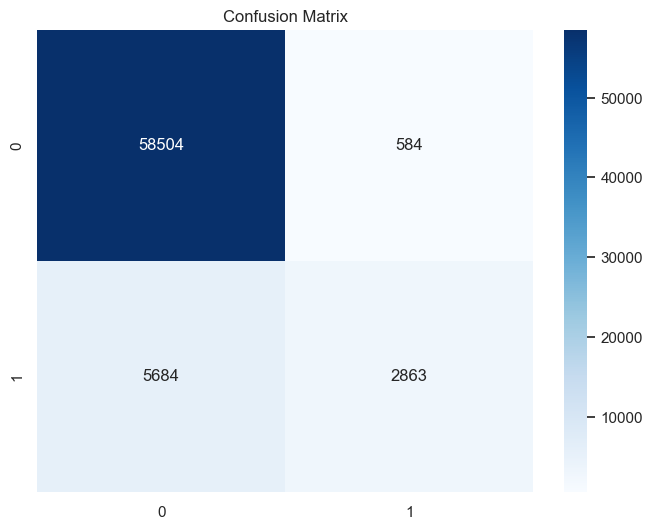

In [49]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [48]:
##XGBoost Classifier
xgb = XGBClassifier()
xgb.fit(X_test, y_test)
y_pred = xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     59088
           1       0.83      0.33      0.48      8547

    accuracy                           0.91     67635
   macro avg       0.87      0.66      0.71     67635
weighted avg       0.90      0.91      0.89     67635



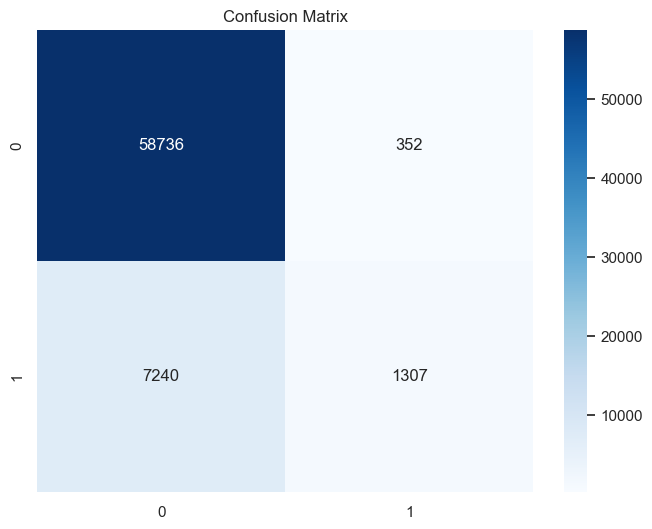

In [47]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [41]:
##Gradient boost
gb = GradientBoostingClassifier()
gb.fit(X_test, y_test)
y_pred = gb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     59088
           1       0.79      0.15      0.26      8547

    accuracy                           0.89     67635
   macro avg       0.84      0.57      0.60     67635
weighted avg       0.88      0.89      0.85     67635



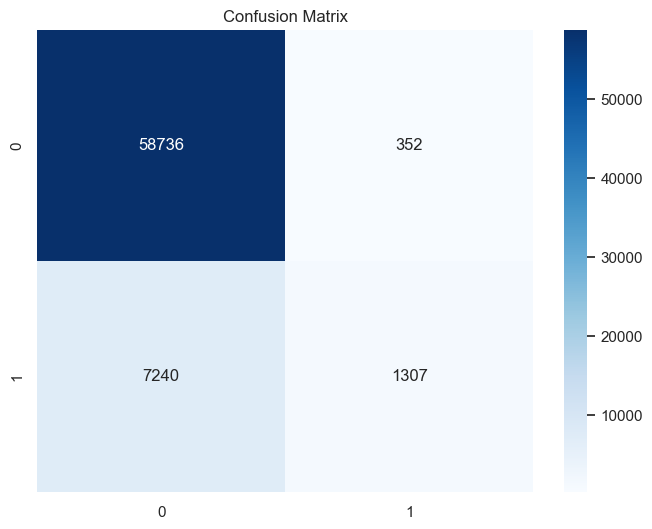

In [44]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 500],
    'max_depth': [3, 5, 7],
    'min_child_weight': [3, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'gamma': [0.1, 0.5],
    # Add other parameters to explore
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

NameError: name 'xgb' is not defined

In [56]:
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     59088
           1       0.71      0.28      0.40      8547

    accuracy                           0.89     67635
   macro avg       0.81      0.63      0.67     67635
weighted avg       0.88      0.89      0.87     67635



In [57]:
best_params

{'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 5,
 'n_estimators': 500}

In [75]:
### Creating Neural Network using tensorflow
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu',
                          input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer 1
    tf.keras.layers.Dense(16, activation='relu'), # Hidden layer 2
    tf.keras.layers.Dense(8, activation='relu'), # Hidden layer 3

    tf.keras.layers.Dense(1, activation='sigmoid') # Output layer
])

In [60]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(patience=15)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# train the model and plot the training and testing loss and accuracy at each epoc
history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_data=(X_test, y_test),
                    callbacks=[early_stop])

Epoch 1/20
8455/8455 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.8841 - loss: 0.2450 - val_accuracy: 0.8843 - val_loss: 0.2419
Epoch 2/20
8455/8455 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8841 - loss: 0.2436 - val_accuracy: 0.8854 - val_loss: 0.2402
Epoch 3/20
8455/8455 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8836 - loss: 0.2446 - val_accuracy: 0.8844 - val_loss: 0.2433
Epoch 4/20
8455/8455 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8837 - loss: 0.2436 - val_accuracy: 0.8854 - val_loss: 0.2427
Epoch 5/20
8455/8455 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.8839 - loss: 0.2433 - val_accuracy: 0.8851 - val_loss: 0.2402
Epoch 6/20
8455/8455 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.8836 - loss: 0.2434 - val_accuracy: 0.8852 - val_loss: 0.2388
Epoch 7/20
8455/8455 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8842 - loss: 0.2428 - val_accuracy: 0.8856 - val_loss: 0.2396
Epoch 8/20
8455/8455 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8846 - loss: 0

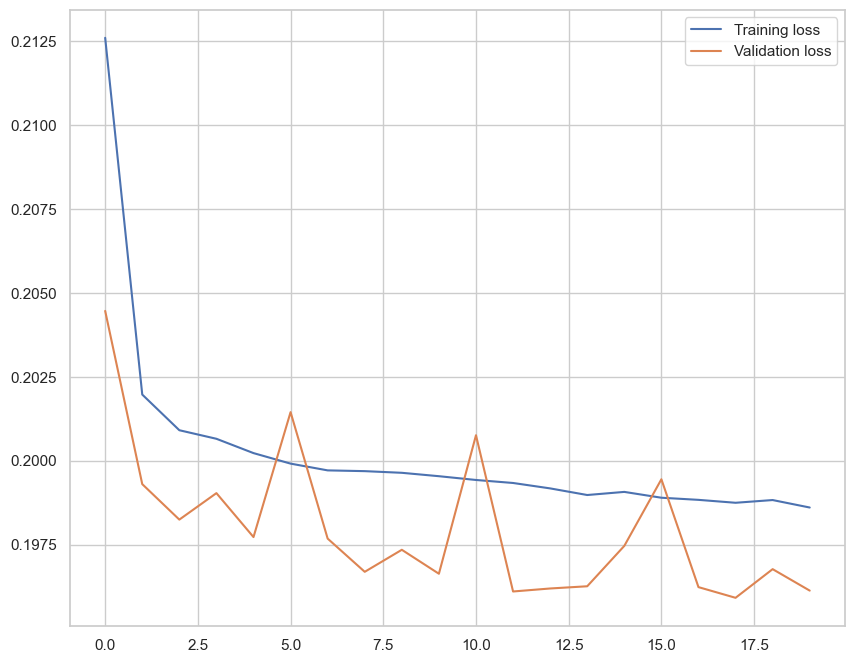

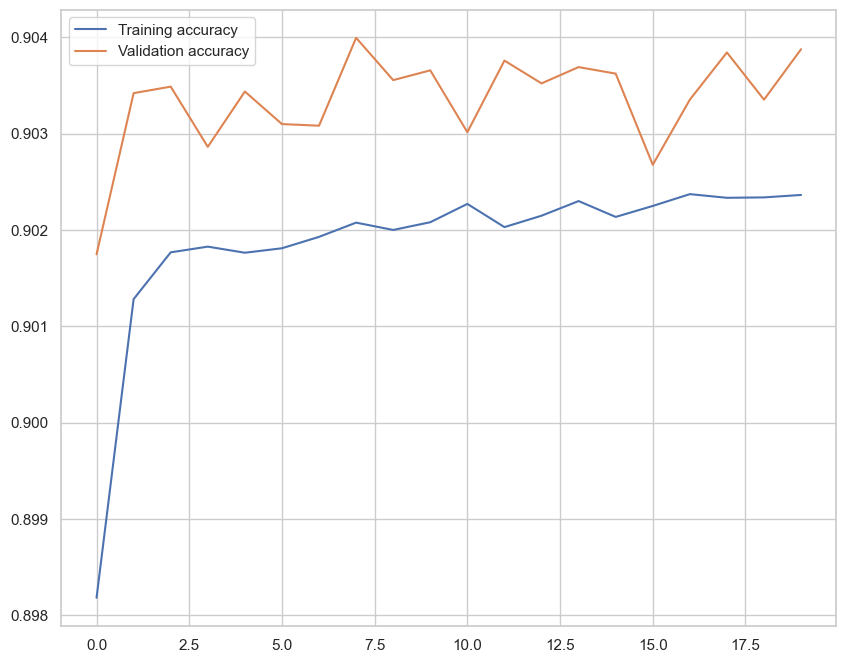

In [74]:
# plot the training and testing loss and accuracy at each epoc
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(history.history['loss'], label='Training loss')
ax.plot(history.history['val_loss'], label='Validation loss')
ax.legend()
plt.show()

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(history.history['accuracy'], label='Training accuracy')
ax.plot(history.history['val_accuracy'], label='Validation accuracy')
ax.legend()
plt.show()

In [62]:
loss = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy Score: ', loss[1])

2114/2114 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8863 - loss: 0.2372
Accuracy Score:  0.8854734897613525


In [21]:
# Function to remove outliers using IQR
def remove_outliers( df, columns ):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers from the data
data = remove_outliers(df, numerical_col)

NameError: name 'numerical_col' is not defined

In [64]:
rows_removed = df.shape[0] - data.shape[0]
print(f'📉 We have removed approximately {rows_removed} rows from the dataset.')

📉 We have removed approximately 42403 rows from the dataset.


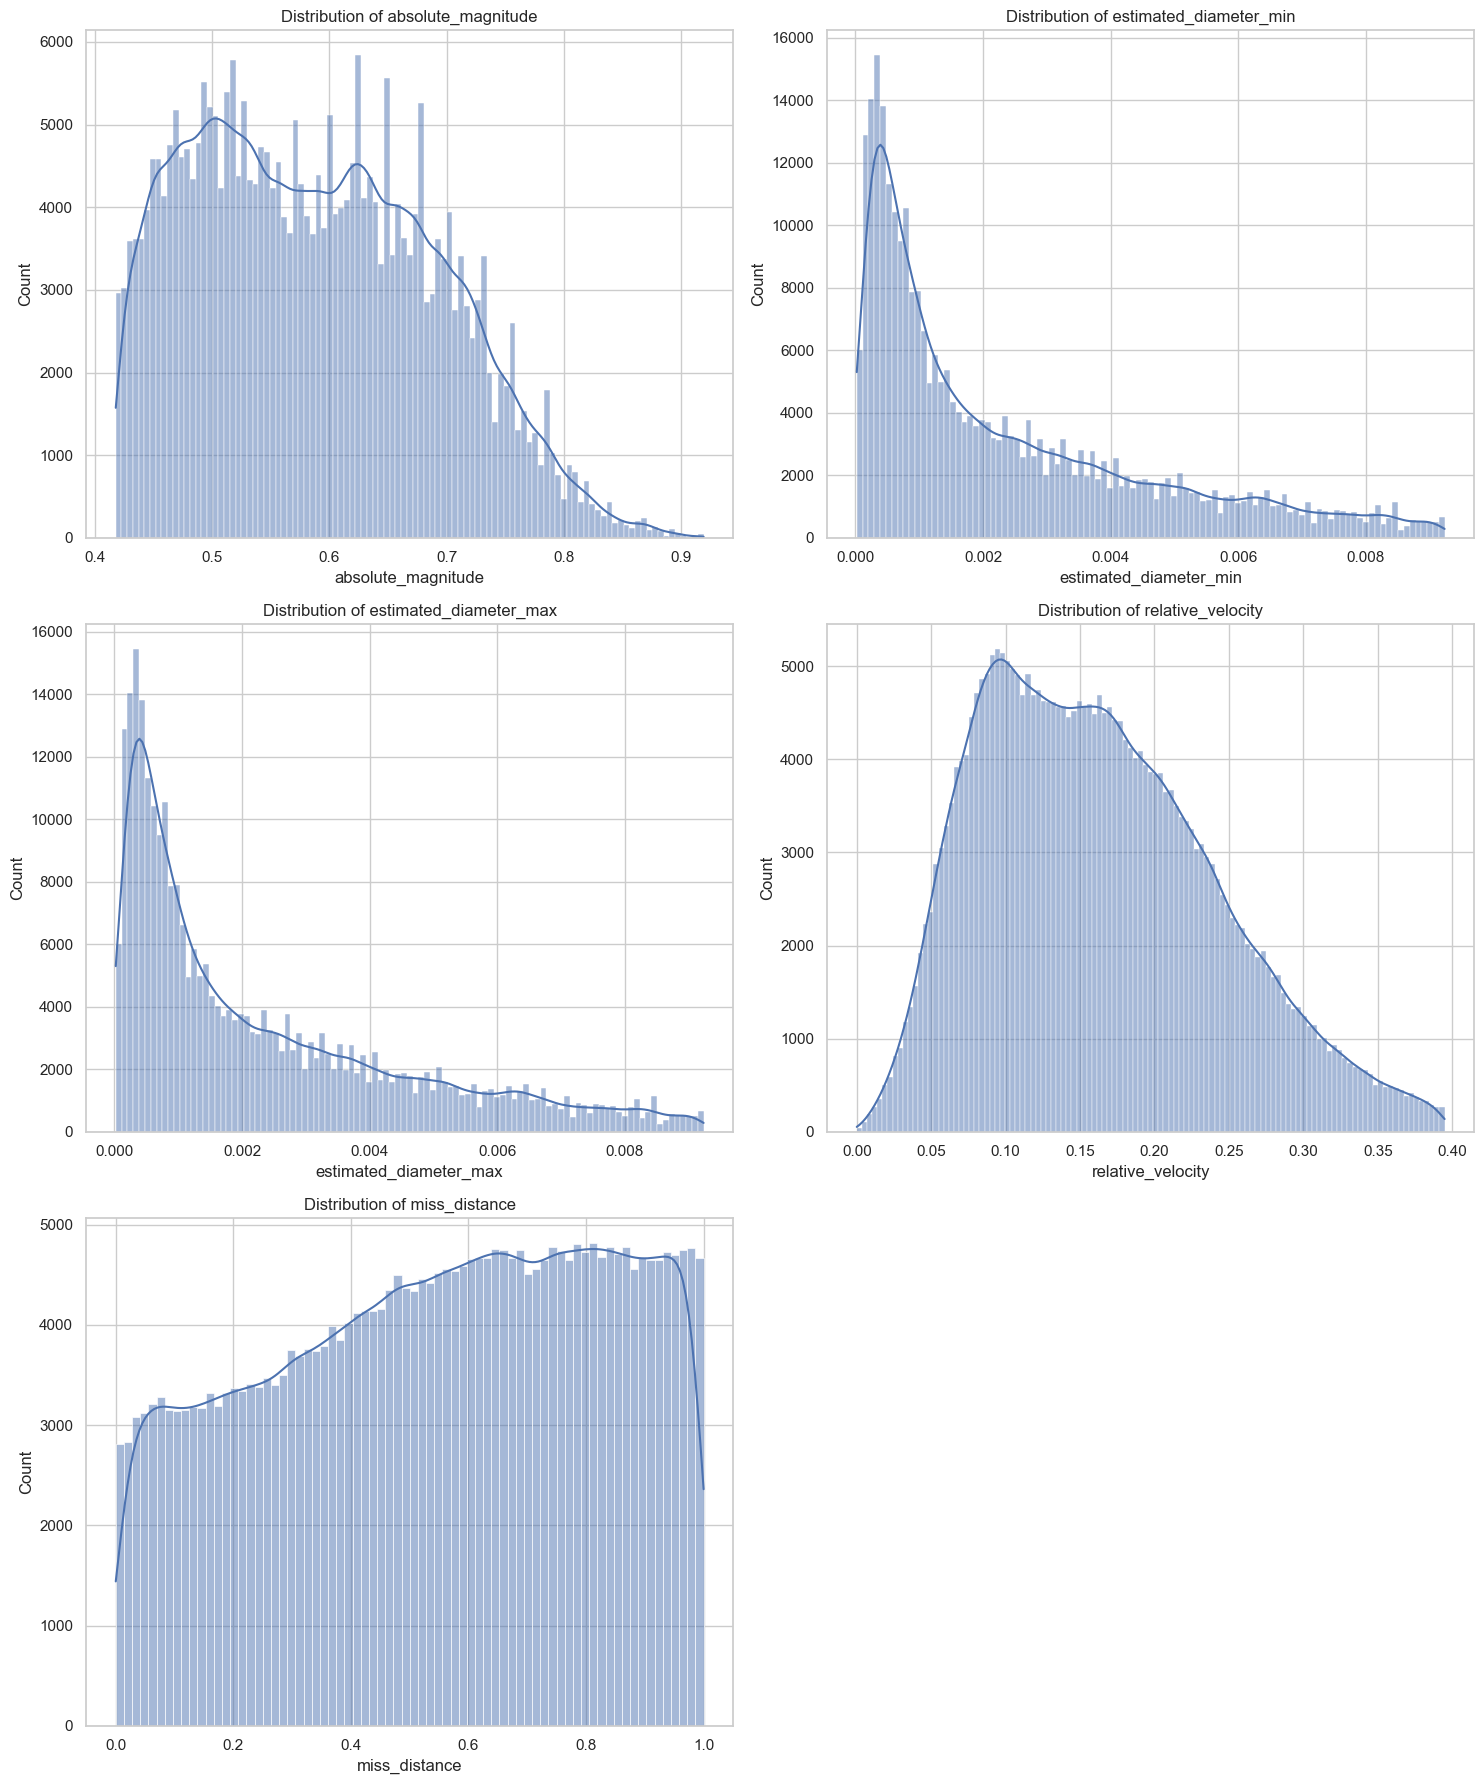

In [65]:
# Histograms
plt.figure(figsize=(15, 18))
for i, col in enumerate(numerical_col):
    plt.subplot(3, 2, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [20]:
### Creating Neural Network using tensorflow
model = tf.keras.models.Sequential ([
    tf.keras.layers.Dense(64, activation='relu',
                          input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer 1
    tf.keras.layers.Dense(16, activation='relu'), # Hidden layer 2
    tf.keras.layers.Dense(8, activation='relu'), # Hidden layer 3

    tf.keras.layers.Dense(1, activation='sigmoid') # Output layer
])

NameError: name 'X_train' is not defined

In [18]:
X=data.drop ('is_hazardous',axis=1)
y=data['is_hazardous']

encoder = LabelEncoder()
y = encoder.fit_transform(y)

scale = MinMaxScaler()
X= scale.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


NameError: name 'data' is not defined

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(patience=15)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# train the model and plot the training and testing loss and accuracy at each epoc
history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_data=(X_test, y_test),
                    callbacks=[early_stop])

NameError: name 'model' is not defined

In [16]:
from sklearn.metrics import classification_report
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))

NameError: name 'X_train' is not defined

In [15]:
df.shape 

(338199, 9)

In [11]:
### Splitting the Data based on is_hazardous
df['is_hazardous'].value_counts()

is_hazardous
False    295037
True      43162
Name: count, dtype: int64

In [12]:
not_nearest = df[df['is_hazardous'] == 0]

In [13]:
nearest = df[df['is_hazardous'] == 1]

In [14]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers from the data
data = remove_outliers(not_nearest, numerical_col)

NameError: name 'numerical_col' is not defined

In [83]:
rows_removed = not_nearest.shape[0] - data.shape[0]
print(f'📉 We have removed approximately {rows_removed} rows from the dataset.')

📉 We have removed approximately 50118 rows from the dataset.


In [84]:
data.shape

(244891, 6)

In [85]:
## Now concat both data and nearest dataframes
df = pd.concat([data, nearest])

In [86]:
df.shape

(288053, 6)

In [87]:
X = df.drop('is_hazardous',axis=1)
y = df['is_hazardous']

encoder = LabelEncoder()
y = encoder.fit_transform(y)

scale = MinMaxScaler()
X= scale.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
from sklearn.metrics import classification_report
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))

Accuracy: 0.94
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     48958
           1       0.85      0.77      0.80      8653

    accuracy                           0.94     57611
   macro avg       0.90      0.87      0.89     57611
weighted avg       0.94      0.94      0.94     57611



In [89]:
### Creating Neural Network using tensorflow
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu',
                          input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(64, activation='relu'), # Hidden layer 1
    tf.keras.layers.Dense(16, activation='relu'), # Hidden layer 2
    tf.keras.layers.Dense(16, activation='relu'), # Hidden layer 3

    tf.keras.layers.Dense(1, activation='sigmoid') # Output layer
])

In [90]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 32)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,633 (14.19 KB)

 Trainable params: 3,633 (14.19 KB)

 Non-trainable params: 0 (0.00 B)

In [91]:
xgb = XGBClassifier()
xgb.fit(X_test, y_test)
y_pred = xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))


Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     48958
           1       0.94      0.70      0.80      8653

    accuracy                           0.95     57611
   macro avg       0.94      0.85      0.89     57611
weighted avg       0.95      0.95      0.94     57611



In [92]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     48958
           1       0.94      0.70      0.80      8653

    accuracy                           0.95     57611
   macro avg       0.94      0.85      0.89     57611
weighted avg       0.95      0.95      0.94     57611



In [93]:
### Checking the accuracy by cross_validation
from sklearn.model_selection import cross_val_score
cross_val_score(xgb, X, y, cv=10, scoring='accuracy')

array([0.92716795, 0.92911199, 0.92966743, 0.93230342, 0.93258115,
       0.92893595, 0.93289359, 0.93195626, 0.92851935, 0.93331019])

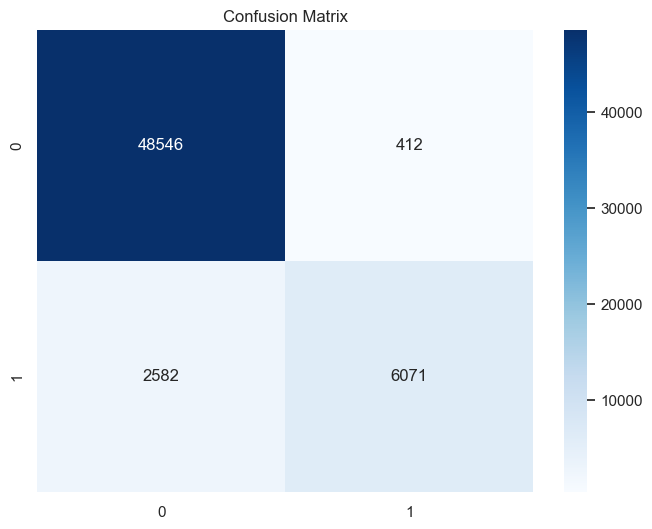

In [94]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()